In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mammographic-masses/mammographic_masses.data', sep = ",", header=None, names=['BI-RADS', 'Age', 'Shape', 'Margin', 'Density', 'Severity'])

In [3]:
df.describe()

,Severity
count,961.000000
mean,0.463059
std,0.498893
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [7]:
#Cleaning stage
for k in df.columns:
    df[k] = df[k].replace('?', np.nan)
df = df.dropna(axis=0)

In [11]:
df.describe()

,Severity
count,830.000000
mean,0.485542
std,0.500092
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [13]:
df.astype('float')
df['Severity'] = df['Severity'].astype('int')

In [17]:
del df['BI-RADS']

In [18]:
features = df.loc[:, df.columns != 'Severity']
label = df['Severity']

In [20]:
X = np.asarray(features)
Y = np.asarray(label)

In [22]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

C:\Users\PCMASTER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\PCMASTER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [23]:
#SPLITTING SUFFLE DATASETS
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=14)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (664, 4) (664,)
Test set: (166, 4) (166,)


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
model= LogisticRegression(C=1, solver='liblinear').fit(X_train,y_train)
model

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [73]:
from sklearn.metrics import jaccard_similarity_score
yhat = model.predict(X_test)
jaccard_similarity_score(y_test, yhat)

0.8373493975903614

In [68]:
C_param_range = [0.000001,0.01,0.1,1,10,100000]
y_hat_1 =[]
results = []
for k in C_param_range:
    y_hat_1 = LogisticRegression(C=k, solver='liblinear').fit(X_train,y_train).predict(X_test)
    results.append(jaccard_similarity_score(y_test, y_hat_1))

In [69]:
results

[0.8253012048192772,
 0.8373493975903614,
 0.8373493975903614,
 0.8373493975903614,
 0.8373493975903614,
 0.8373493975903614]

In [74]:
yhat_prob = model.predict_proba(X_test)

In [75]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.41091506841370407

In [76]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[69 12]
 [15 70]]


Confusion matrix, without normalization
[[69 12]
 [15 70]]


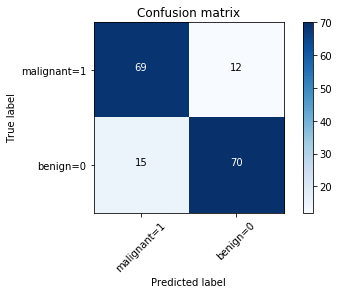

In [80]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['malignant=1','benign=0'],normalize= False,  title='Confusion matrix')

In [78]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        85
           1       0.82      0.85      0.84        81

   micro avg       0.84      0.84      0.84       166
   macro avg       0.84      0.84      0.84       166
weighted avg       0.84      0.84      0.84       166

